In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the dataset
df = pd.read_excel(r'C:\Users\Arpita\Desktop\Flight Dataset.xlsx')
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price (in ₹)
0,Air India,New Delhi,Mumbai,07:00,09:00,2h 00m,Non Stop,Free Meal,2476
1,Air India,New Delhi,Mumbai,09:00,11:15,2h 15m,Non Stop,Free Meal,2476
2,Air India,New Delhi,Mumbai,15:05,18:10,3h 05m,1 stop,Free Meal,2791
3,Air India,New Delhi,Mumbai,17:50,21:35,3h 45m,1 stop,Free Meal,2791
4,Jet Airways,New Delhi,Mumbai,07:55,10:15,2h 20m,Non Stop,Free Meal,3173
...,...,...,...,...,...,...,...,...,...
1545,Air India,Bangalore,New Delhi,08:15,18:30,10h 15m,1 stop,No info,4943
1546,Air India,Bangalore,New Delhi,00:30,23:55,23h 25m,1 stop,No info,10394
1547,Jet Airways,Bangalore,New Delhi,11:40,21:20,9h 40m,1 stop,1 Long layover,27992
1548,IndiGo,Bangalore,New Delhi,18:25,21:20,2h 55m,non-stop,No info,7648


In [9]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price (in ₹)
0,Air India,New Delhi,Mumbai,07:00,09:00,2h 00m,Non Stop,Free Meal,2476
1,Air India,New Delhi,Mumbai,09:00,11:15,2h 15m,Non Stop,Free Meal,2476
2,Air India,New Delhi,Mumbai,15:05,18:10,3h 05m,1 stop,Free Meal,2791
3,Air India,New Delhi,Mumbai,17:50,21:35,3h 45m,1 stop,Free Meal,2791
4,Jet Airways,New Delhi,Mumbai,07:55,10:15,2h 20m,Non Stop,Free Meal,3173


In [8]:
df.tail()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price (in ₹)
1545,Air India,Bangalore,New Delhi,08:15,18:30,10h 15m,1 stop,No info,4943
1546,Air India,Bangalore,New Delhi,00:30,23:55,23h 25m,1 stop,No info,10394
1547,Jet Airways,Bangalore,New Delhi,11:40,21:20,9h 40m,1 stop,1 Long layover,27992
1548,IndiGo,Bangalore,New Delhi,18:25,21:20,2h 55m,non-stop,No info,7648
1549,IndiGo,Bangalore,New Delhi,10:05,13:00,2h 55m,non-stop,No info,7648


In [4]:
df.shape

(1550, 9)

In [5]:
df.dtypes

Airline            object
Source             object
Destination        object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price (in ₹)        int64
dtype: object

In [6]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price (in ₹)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1550 non-null   object
 1   Source           1550 non-null   object
 2   Destination      1550 non-null   object
 3   Dep_Time         1550 non-null   object
 4   Arrival_Time     1550 non-null   object
 5   Duration         1550 non-null   object
 6   Total_Stops      1550 non-null   object
 7   Additional_Info  1550 non-null   object
 8   Price (in ₹)     1550 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 109.1+ KB


# Data Cleaning

In [10]:
# Checking for null values
df.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price (in ₹)       0
dtype: int64

As we can see that there is no null values in our dataset

<AxesSubplot:>

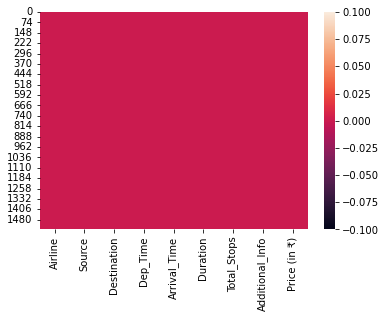

In [11]:
#Plotting on heatmap
sn.heatmap(df.isnull())

# EDA

<AxesSubplot:xlabel='Price (in ₹)', ylabel='Density'>

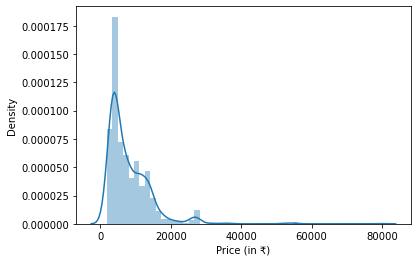

In [12]:
sn.distplot(df['Price (in ₹)'])

From above graph we can see that the maximum flights are within ₹ 10000

<AxesSubplot:xlabel='Price (in ₹)'>

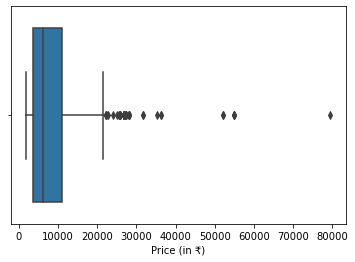

In [13]:
#Checking for Outliers
sn.boxplot(df['Price (in ₹)'])

We can see that outliers are present in our target column

<AxesSubplot:xlabel='Price (in ₹)'>

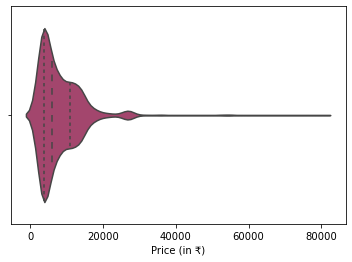

In [15]:
sn.violinplot(x=df['Price (in ₹)'], inner="quartile", color="#B3366B")

The violin plot is for the target variable. The width of the violin represents the frequency.

We can see from the plot that most flight prices fall within 10,000. The dashed lines represent the locations of the three quartiles Q1, Q2 (the median), and Q3.

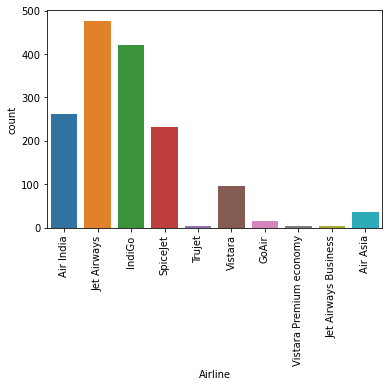

In [16]:
sn.countplot(df['Airline'])
plt.xticks(rotation=90)
plt.show()

From the above graph we can see that the maximum flights taken/available belongs to airline 'Jet Airways' followed by "IndiGo" and "Air India".

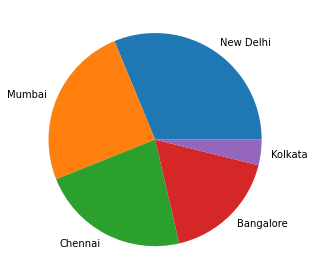

In [17]:
plt.pie(df['Source'].value_counts(), labels=df['Source'].unique(),shadow=False)
plt.tight_layout()
plt.show()

New Delhi and Mumbai have more flights compared to other sources.

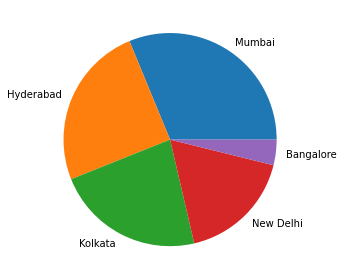

In [18]:
plt.pie(df['Destination'].value_counts(), labels=df['Destination'].unique(),shadow=False)
plt.tight_layout()
plt.show()

Maximum passengers take a flight to Mumbai.

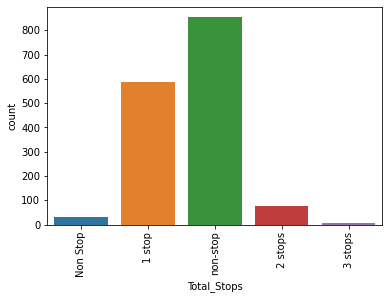

In [19]:
sn.countplot(df['Total_Stops'])
plt.xticks(rotation=90)
plt.show()

Maximum flights are with no-stop followed by 1 stop flights.

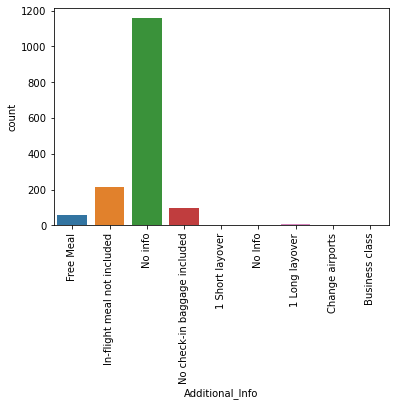

In [21]:
sn.countplot(df['Additional_Info'])
plt.xticks(rotation=90)
plt.show()

There is no 'Additional_Info' for maximum flights. Only few flights offer free meal and no check-in baggage.

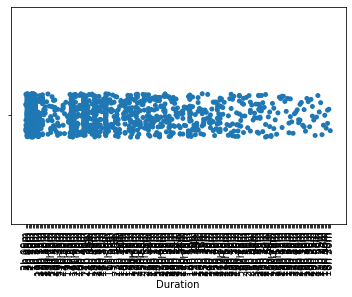

In [22]:
sn.stripplot(df['Duration'])
plt.xticks(rotation=90)
plt.show()

Since departure time , arrival time and duration have a wide number of unique values in it , so we will not be performing Univariate Analysis.

# Bivariate Analysis

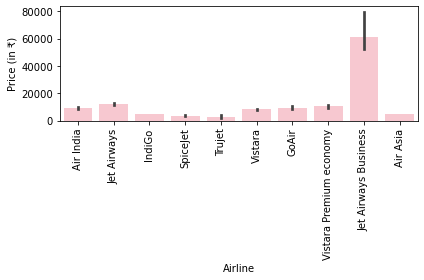

In [23]:
sn.barplot(x=df['Airline'],y=df['Price (in ₹)'],color='pink')
plt.xticks(rotation=90)
plt.tight_layout()

The Highest priced 'Airline' is Jet airways business and the cheapest is Spicejet.

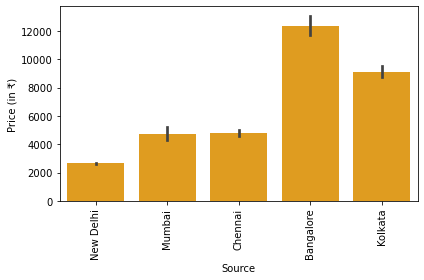

In [24]:
sn.barplot(x=df['Source'],y=df['Price (in ₹)'],color='orange')
plt.xticks(rotation=90)
plt.tight_layout()

Flights from Bangalore and Kolkata are costly.

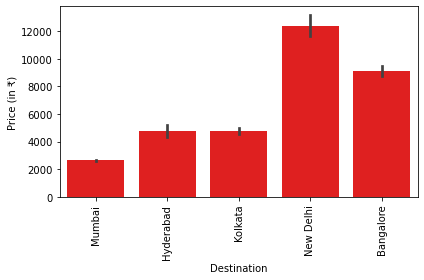

In [25]:
sn.barplot(x=df['Destination'],y=df['Price (in ₹)'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

Flights to New Delhi and Bangalore are costly.

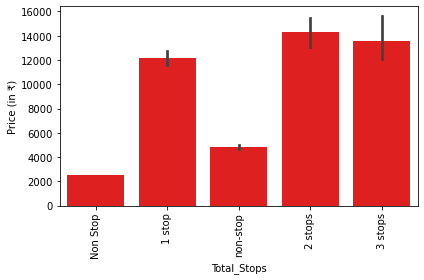

In [27]:
sn.barplot(x=df['Total_Stops'],y=df['Price (in ₹)'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

2 stops flights are high priced.

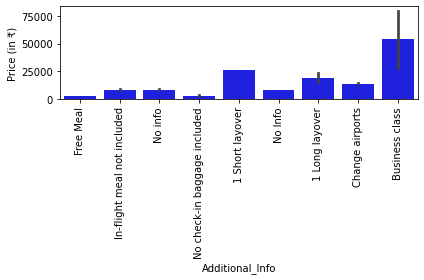

In [29]:
sn.barplot(x=df['Additional_Info'],y=df['Price (in ₹)'],color='blue')
plt.xticks(rotation=90)
plt.tight_layout()

Direct flights fit in budget but they do not give any free meal or layovers.

In [32]:
df.drop(['Price (in ₹)'],axis=1).astype('category')

#encoding the feature variables using label encoder technique.
le=LabelEncoder()
cnt=0
for col in df:
    if df[col].dtype=='object':
        le.fit(df[col])
        df[col] = le.transform(df[col])
        cnt += 1
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price (in ₹)
0,1,4,3,25,142,149,3,4,2476
1,1,4,3,41,214,150,3,4,2476
2,1,4,3,84,298,166,0,4,2791
3,1,4,3,109,355,169,0,4,2791
4,4,4,3,31,186,151,3,4,3173
...,...,...,...,...,...,...,...,...,...
1545,1,0,4,34,307,0,0,8,4943
1546,1,0,4,0,398,105,0,8,10394
1547,4,0,4,60,352,219,0,0,27992
1548,3,0,4,111,352,158,4,8,7648


# Multivariate Analysis

<AxesSubplot:>

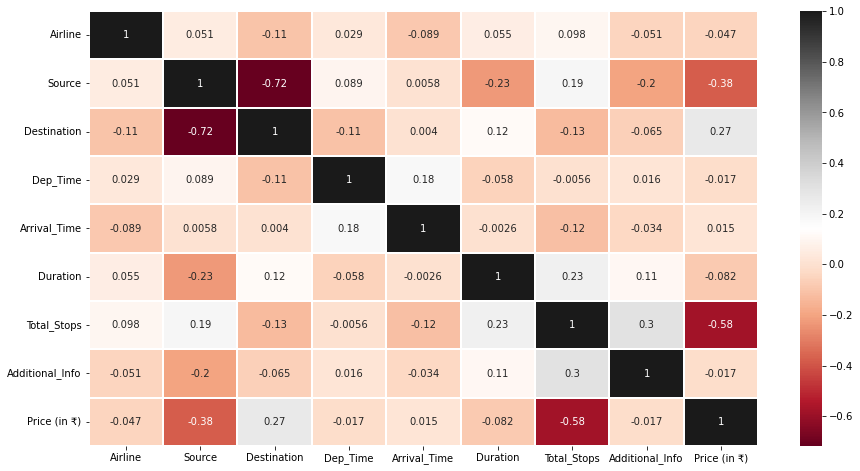

In [33]:
a=df.corr()
plt.figure(figsize=(15,8))
sn.heatmap(a,linewidth=0.1, cmap="RdGy", annot = True)

No multicollinearity in the dataset.

# Model Building

In [36]:
#Separating feature and target variables into x and y.
x = df.drop(['Price (in ₹)'],axis=1)
y = df['Price (in ₹)']

In [40]:
# Scaling the fearure variable
scale = StandardScaler()
x=scale.fit_transform(x)

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 45 )

# Decision Tree Regressor

In [42]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
pred_train_dtr=dtr.predict(xtrain)
pred_test_dtr=dtr.predict(xtest)
print('Decision Tree Regressor Score:',dtr.score(xtrain,ytrain))
print('Decision Tree Regressor r2_score:',r2_score(ytest,pred_test_dtr))
print("Mean squared error of Decision Tree Regressor:",mean_squared_error(ytest,pred_test_dtr))
print("Root Mean Square error of Decision Tree Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_dtr)))

Decision Tree Regressor Score: 0.9702228241618172
Decision Tree Regressor r2_score: 0.7656632115838157
Mean squared error of Decision Tree Regressor: 8099140.313479304
Root Mean Square error of Decision Tree Regressor: 2845.8988586173095


# K-Neighbors Regressor

In [43]:
knr = KNeighborsRegressor()
knr.fit(xtrain,ytrain)
pred_train_knr=knr.predict(xtrain)
pred_test_knr=knr.predict(xtest)
print('K Neighbors Regressor Score:',knr.score(xtrain,ytrain))
print('K Neighbors Regressor r2_score:',r2_score(ytest,pred_test_knr))
print("Mean squared error of K Neighbors Regressor:",mean_squared_error(ytest,pred_test_knr))
print("Root Mean Square error of K Neighbors Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_knr)))

K Neighbors Regressor Score: 0.7662477798580302
K Neighbors Regressor r2_score: 0.5971457985335274
Mean squared error of K Neighbors Regressor: 13923433.557333333
Root Mean Square error of K Neighbors Regressor: 3731.4117378457895


# SGD Regressor

In [44]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
pred_train_sgd=sgd.predict(xtrain)
pred_test_sgd=sgd.predict(xtest)
print('SGD Regressor Score:',sgd.score(xtrain,ytrain))
print('SGD Regressor r2_score:',r2_score(ytest,pred_test_sgd))
print("Mean squared error of SGD Regressor:",mean_squared_error(ytest,pred_test_sgd))
print("Root Mean Square error of SGD Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_sgd)))

SGD Regressor Score: 0.41809941105310067
SGD Regressor r2_score: 0.44221301326541984
Mean squared error of SGD Regressor: 19278215.346080847
Root Mean Square error of SGD Regressor: 4390.69645342067


# Random Forest Regressor

In [45]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
pred_test_rf=rf.predict(xtest)
print('Random Forest Regressor Score:',rf.score(xtrain,ytrain))
print('Random Forest Regressor r2_score:',r2_score(ytest,pred_test_rf))
print("Mean squared error of Random Forest Regressor:",mean_squared_error(ytest,pred_test_rf))
print("Root Mean Square error of Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_rf)))

Random Forest Regressor Score: 0.9402091190146721
Random Forest Regressor r2_score: 0.820173323663499
Mean squared error of Random Forest Regressor: 6215163.626674342
Root Mean Square error of Random Forest Regressor: 2493.022989600044


# Gradient Boosting Regressor

In [46]:
gb=GradientBoostingRegressor()
gb.fit(xtrain,ytrain)
pred_train_gb=gb.predict(xtrain)
pred_test_gb=gb.predict(xtest)
print('Gradient Boosting Regressor Score:',gb.score(xtrain,ytrain))
print('Gradient Boosting Regressor r2_score:',r2_score(ytest,pred_test_gb))
print("Mean squared error of Gradient Boosting Regressor:",mean_squared_error(ytest,pred_test_gb))
print("Root Mean Square error of Gradient Boosting Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_gb)))

Gradient Boosting Regressor Score: 0.8672834676678809
Gradient Boosting Regressor r2_score: 0.7604946267590929
Mean squared error of Gradient Boosting Regressor: 8277776.770863897
Root Mean Square error of Gradient Boosting Regressor: 2877.1125752851412


# Cross Validation Score

In [47]:
print('Cross Validation Score of Decision Tree Regressor is',(cvs(dtr,x,y,cv=5).mean())*100)
print('Cross Validation Score of KNeighbors Regressor is',(cvs(knr,x,y,cv=5).mean())*100)
print('Cross Validation Score of SGD Regressor is',(cvs(sgd,x,y,cv=5).mean())*100)
print('Cross Validation Score of Random Forest Regressor is',(cvs(rf,x,y,cv=5).mean())*100)
print('Cross Validation Score of Gradient Boosting Regressor is',(cvs(gb,x,y,cv=5).mean())*100)

Cross Validation Score of Decision Tree Regressor is 48.45440297430954
Cross Validation Score of KNeighbors Regressor is 42.96200503961779
Cross Validation Score of SGD Regressor is 7.167115757307248
Cross Validation Score of Random Forest Regressor is 59.22950093018808
Cross Validation Score of Gradient Boosting Regressor is 55.63678064029548


The least difference between r2_score and cross validation score is for Random Forest Regressor, hence we will use that model.

# Hyper Parameter Tuning

In [48]:
parameter = { 'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],}

gvc = GridSearchCV(RandomForestRegressor(),parameter,cv=5)
gvc.fit(xtrain,ytrain)
gvc.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [50]:
flightprice = RandomForestRegressor(bootstrap=False,min_samples_leaf=1,max_features='sqrt',min_samples_split=5)
flightprice.fit(xtrain,ytrain)
pred=flightprice.predict(xtest)
acc=r2_score(ytest,pred)
print('Score of Hyper Parameter Tuned Ranfom Forest Regressor is:',flightprice.score(xtrain,ytrain))
print('Accuracy for predicting price of flight is', (acc*100),'%')
print("Mean squared error of Hyper Parameter Tuned Random Forest Regressor:",mean_squared_error(ytest,pred))
print("Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred)))

Score of Hyper Parameter Tuned Ranfom Forest Regressor is: 0.9411019301918506
Accuracy for predicting price of flight is 77.20689468215558 %
Mean squared error of Hyper Parameter Tuned Random Forest Regressor: 7877745.504528885
Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor: 2806.7321754183968


# Conclusion

In [51]:
a= np.array(ytest)
predicted = np.array(flightprice.predict(xtest))
fp=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
fp

,Original,Predicted
0,3597,3597.000000
1,2227,2269.000000
2,6528,9157.405000
3,13364,13329.514167
4,8040,10053.763333
...,...,...
460,8352,10964.200000
461,3597,3597.000000
462,16736,13726.360833
463,3739,3994.933333


The predicted price lies very close to the original price. Hence we accept this model.

# Saving the model

In [52]:
import pickle
filename = 'FlightPrice.pkl'
pickle.dump(flightprice,open(filename,'wb'))

Best Model is saved with the name 'FlightPrice.pkl'